# Анализ маркетинговых расходов

__Цель исследования__: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

__Данные исследования__: данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

__Необходимо изучить__:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
-  когда расходы на привлечение клиента окупаются.

__Примечание__:Выручка измеряется в условных единицах — у.е.

__Выполненные задачи в рамках проекта:__
- подготовлены данные для анализа;
- подсчитаны продуктовые метрики (DAU, WAU,MAU и Retention Rate с использованием когортного анализа)
- подсчитаны метрики электронной коммерции (с помощью когортного анализа подсчитано среднее количество покупок, средний чек и LTV на покупателя по когортам);
- подсчитаны маркетинговые метрики (рассчитан средний CAC, ROMI по когортам в разрезе источников);
- построены графики изменения каждой метрики во времени;
- cформулированы выводы и рекомендации по определению источники трафика, на которые маркетологам стоит делать упор.

## Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">1. Изучение общей информации</a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">2. Расчет метрик и построение графиков</a></li>
    <ul>
        <li><a style="text-decoration: none" href="#product_metrics">Продуктовые метрики</a></li>
        <li><a style="text-decoration: none" href="#e-commerce_metrics">Метрики электронной коммерции</a></li>
        <li><a style="text-decoration: none" href="#marketing_metrics">Маркетинговые метрики</a></li>
    </ul>  
    <li><a style="text-decoration: none" href="#conclusion">3. Сформулируйте выводы и рекомендации</a></li>
</ul>

## 1. Изучение общей информации <a name="introduction"></a> 

In [1]:
#Импортирую библиотеку
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю три новых DataFrame - visits, orders и costs.

In [2]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

Создаю функцию для получения основной информации о датафрейме

In [3]:
#функция для получения основной информации о датафрейме
def data_describe(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()
    
#делаем массив 
data=[visits, orders, costs]

#запускаем функцию
for d in data:
    data_describe(d)    

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


__Получаю следующую структуру таблиц__:
* __``visits``__
    * Количество столбцов: __5__
    * Количество строк: __359400__
    * Тип данных в столбцах: __int64(1), object(3), uint64(1)__


* __``orders``__
    * Количество столбцов: __3__
    * Количество строк: __50415__
    * Тип данных в столбцах: __float64(1), object(1), uint64(1)__


* __``costs``__
    * Количество столбцов: __3__
    * Количество строк: __2542__
    * Тип данных в столбцах: __float64(1), int64(1), object(1)__     

>**<span style="color:green">Очень здорово, что ты используешь свои собственные функции для знакомства с данными — это очень сильно повышает читаемость твоего кода и экономит тебе самому массу времени.</span>**

Приводим название столбцов к нижнему реестру

In [4]:
#Переименовываем название столбцов к таблице visits
visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'uid'}, inplace=True)

#Переименовываем название столбцов в таблице orders
orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'}, inplace=True)

#Переименовываем название одного столбца в таблице costs
costs.rename(columns={'dt': 'date'}, inplace=True)

Прописываем функцию, которая переводит тип столбца в даты

In [5]:
#Создаем функцию которая переводит тип столбца в даты. Параметрами функции является date (название DateFreim) и row (название столбца)
def datetime(date, row):
    date[row] = pd.to_datetime(date[row])

#Применяем функцию к необходимым столбцам в трех созданных нами     
datetime(visits, 'end_ts')
datetime(visits, 'start_ts')
datetime(orders, 'buy_ts')
datetime(costs, 'date')    

#Проверяем применилась ли эта функция к необходимым столбцам
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


__Выводы:__<br>
<br>
Полученные таблицы содержат в себе информацию о визитах, о заказах и о полученных расходах. В рамках работы с полученными таблицами были приведены название столбцов к нижнему реестру с объединением двух слов в одно название столбца, а также в некоторых столбцах был преобразован тип данных из типа object в datetime64.

## 2. Расчет метрик и построение графиков <a name="data_pre-processing"></a> 

###  2.1. Продуктовые метрики <a name="product_metrics"></a> 

#### Расчет DAU, WAU и MAU.
Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период.

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату. 

In [6]:
#Находим год
visits['session_year']  = visits['start_ts'].dt.year
#Находим месяц
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
#Находим неделю
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
#Находим полную дату
visits['session_start_dt'] = visits['start_ts'].dt.date


print(visits.head()) 

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year session_month session_week  \
0  16879256277535980062          2017    2017-12-01   2017-12-14   
1    104060357244891740          2018    2018-02-01   2018-02-15   
2   7459035603376831527          2017    2017-07-01   2017-06-29   
3  16174680259334210214          2018    2018-05-01   2018-05-17   
4   9969694820036681168          2017    2017-12-01   2017-12-21   

  session_start_dt  
0       2017-12-20  
1       2018-02-19  
2       2017-07-01  
3       2018-05-20  
4       2017-12-27  


Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее. Таким образом, количество уникальных посетителей составляет 907, еженедельно - 5621, а eжемесячно - 23228.<br>
Также произвели расчеты __sticky factor__, который показывает регулярность использования вашего приложения. Sticky Factor за неделю составляет 3%, sticky Factor за месяц составляет 15%.


In [7]:
#находим показател DAU
dau_total = visits.groupby('session_start_dt').agg({'uid': 'nunique'}).mean()
#находим показател WAU
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
#находим показател MAU
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('DAU составляет', int(dau_total))
print('WAU составляет', int(wau_total))
print('MAU составляет', int(mau_total))

#произведем расчеты sticky Factor 
sticky_mau = dau_total/mau_total *100
sticky_wau = dau_total/wau_total *100

print('Sticky Factor за неделю составляет', int(sticky_mau), '%')
print('Sticky Factor за месяц составляет', int(sticky_wau), '%')

DAU составляет 907
WAU составляет 5621
MAU составляет 23228
Sticky Factor за неделю составляет 3 %
Sticky Factor за месяц составляет 16 %


Построим функцию, которая нам будет вырисовывать графики по метрикам (DAU, WAU, MAU) в динамике по времени.

In [8]:
#Строим функцию
def function(data, x, y, title): 
    fig = px.line(data, x=x, y=y, title=title)
    fig.show(renderer='svg')

В целом исходя из динамики можем сделать вывод, что динамика со временем начала снижаться и достигла пика 24 ноября 2017 года, в этот день количество пользователей достигла 3319 человек. Затем идет спад по метрики DAU, хотя в некоторые периоды наблюдается рост.

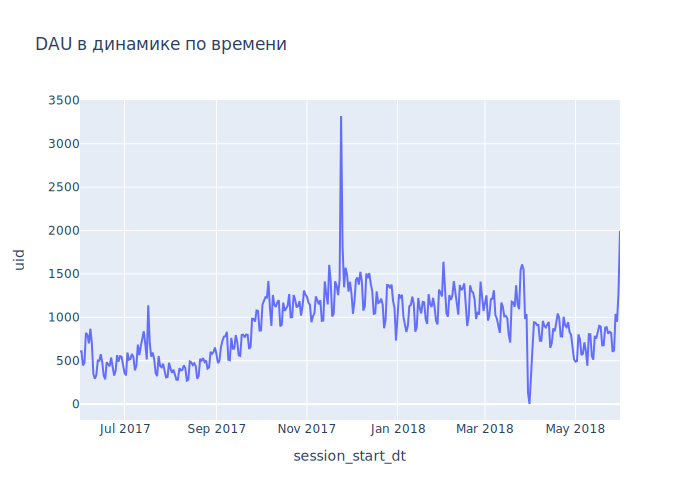

In [9]:
dau_day = visits.groupby('session_start_dt').agg({'uid': 'nunique'}).reset_index()
#Строим график по показателям DAU 
function(dau_day, 'session_start_dt', 'uid', 'DAU в динамике по времени')

В целом динамика по WAU схожа с динамикой по DAU, пик приходится на последнюю неделю ноября 2017 года, дальше идет падение с ростом в феврале и марте 2018 года.

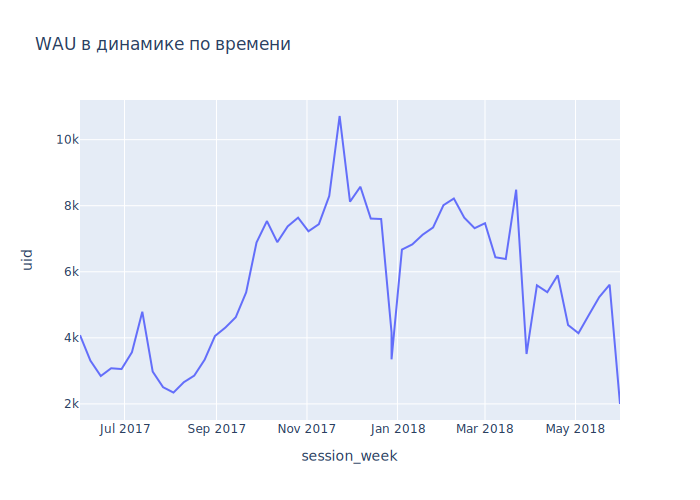

In [10]:
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
function(wau_total, 'session_week', 'uid', 'WAU в динамике по времени')

График MAU в целом показывает динамику, что и по предыдущим графикам. Самый посещаемый месяц это ноябрь 2017 года, а самый низкопосещаемый август 2017 года.

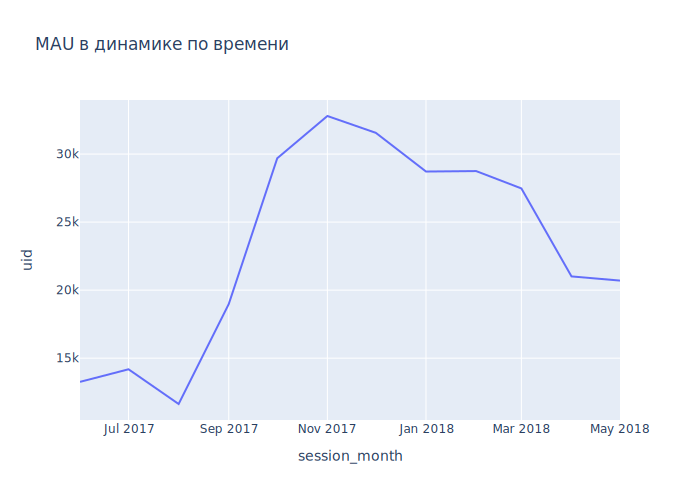

In [11]:
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
function(mau_total, 'session_month', 'uid', 'MAU в динамике по времени')

#### Средний заход пользователя на сайт
Определим, сколько раз за день пользователи в среднем заходят на сайт.

In [12]:
#Создаем группировку для подсчета сколько раз за день пользователи в среднем заходят на сайт по количеству заходов с количеством уникальных пользователей
sessions_per_user = visits.groupby('session_start_dt').agg({'uid': ['count', 'nunique']}).reset_index()
#Переименовываем столбцы
sessions_per_user.columns = ['session_start_dt', 'n_sessions', 'n_users']

#разделим число заходов на количество пользователей
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
#находим среднее значение
sessions_per_user['sessions_per_user'].mean()

1.0821696440039723

Отобразим данный показател в динамике, на основе построения графика. В среднем можно говорить о том, что на сайт заходят менее 1,21, при этом данный показатель наблюдается только в один день 24 ноября, а самый низкий показатель наблюдается 1,02 - 30 марта 2018 года.

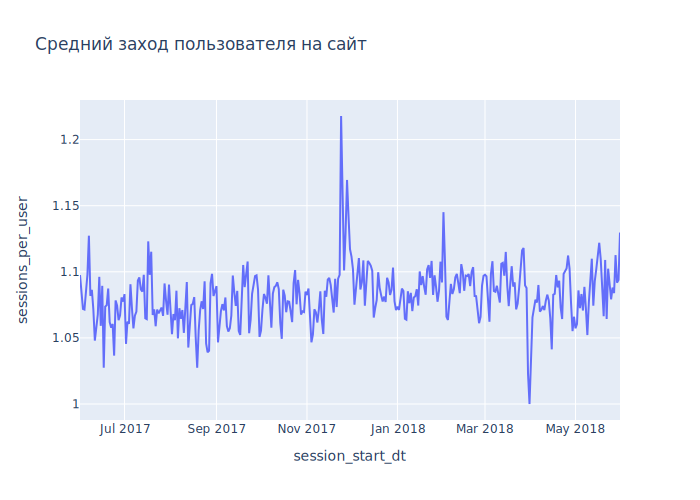

In [13]:
function(sessions_per_user, 'session_start_dt', 'sessions_per_user', 'Средний заход пользователя на сайт')


В день один пользователь в среднем проводит в приложении максимум 1 сессию. Не сказать, что продукт используется регулярно.

#### Время пользователей  на сайте
Исследуeм сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период.  

In [14]:
#считаем длину всех сессий
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
#Вычсиляем среднее
visits['session_duration_sec'].mean()

643.506488592098

Таким образом средняя продолжительность за один заход на сайте составляет 643 секунды, то есть чуть больше 10 минут. Постороим гистограмму распределения.

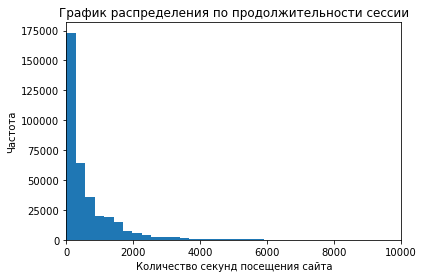

In [15]:
#Построим гистограмму
(visits['session_duration_sec'].plot(kind='hist', bins=300)
                               .set(title='График распределения по продолжительности сессии',
                                   xlabel='Количество секунд посещения сайта',
                                   ylabel='Частота'))
plt.xlim(0, 10000)
plt.show()

Так как распределение не близко к нормальному, то нужно использовать моду (значение в выборке, которое встречается чаще всего).

In [16]:
asl = visits['session_duration_sec'].mode()
asl

0    60
dtype: int64

Мода составила 60 секунд. В случае если пользователь успевает сделать заказ, то это нормальное время, а если нет нужно проверять почему так происходит.

#### Рассчет Retention Rate

Для расчета Retention Rate нам необходимо применять когортный анализ. Для этого будет использовать данные из двух таблиц - __visits__ и __orders__. Для определения когортного анализа необходимо сгруппировать по дате первого захода пользователя. 

In [17]:
#Чтобы определить когортный анализ необходимо сгруппировать по дате первой сессии каждого пользователя
first_visit = visits.groupby(['uid']).agg({'start_ts': 'min'}).reset_index()
first_visit.columns = ['uid', 'first_session_ts']
first_visit['first_session_dt'] = first_visit['first_session_ts'].dt.date
#Для удобства группировки добавим месяц
first_visit['first_sessions_month'] = first_visit['first_session_dt'].astype('datetime64[M]')
first_visit.head(5)

,uid,first_session_ts,first_session_dt,first_sessions_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


Объединим датафрейм visits и Series first_visit по столбцу 'uid', а затем рассчитываем сколько прошло времени между каждой сессией и первой сессией пользователя. Для приведеняи данные столбца в месяц используем метод __np.timedelta64(1,'M')__

In [18]:
#Добавляем информацию о первом визите в датафрейм с посетителями
visits_new = pd.merge(first_visit, visits, on='uid')
#Рассчитываем сколько прошло времени между каждой сессией и первой сессией пользователя
visits_new['cohort_lifetime'] = (visits_new['session_month'] - visits_new['first_sessions_month'])/ np.timedelta64(1,'M')
#Округляем полученные значения и приводим к целому числу
visits_new['cohort_lifetime'] = visits_new['cohort_lifetime'].round().astype('int')

Затем с помощью метода __pivot_table__ построим когортный анализ по количеству посетителей, в которой в индексе будет __first_sessions_month__, в столбцах  __cohort_lifetime__, а в значениях количество уникальных пользователей.

In [19]:
#Делаем когортный анализ по количеству посетителей
cohorts = visits_new.pivot_table(
    index='first_sessions_month', 
    columns='cohort_lifetime',
    values='uid',
    aggfunc='nunique'
)

cohorts.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_sessions_month,,,,,,,,,,,,
2017-06-01,13259.0,1043,713,814,909,947,809,766,694,674,539,596
2017-07-01,13140.0,737,674,738,765,633,596,601,510,376,361,
2017-08-01,10181.0,783,640,639,510,448,370,402,284,265,,
2017-09-01,16704.0,1428,1156,847,658,632,599,404,381,,,
2017-10-01,25977.0,2042,1357,1012,890,837,555,529,,,,
2017-11-01,27248.0,2133,1202,1054,919,638,594,,,,,
2017-12-01,25268.0,1410,960,786,512,481,,,,,,
2018-01-01,22624.0,1351,890,565,458,,,,,,,
2018-02-01,22197.0,1267,565,446,,,,,,,,


В заключении произведем расчеты по Retention Rate. Для этого создадим новый DataFrame под названием __retention__. С помощью цикла загрузим в него отношение текущего количества активных пользователей на n-промежутке к количеству посетителей на нулевом lifetame. Затем построим тепловую карту методом __heatmap()__ . Передадим ему данные таблицы __retention__ 

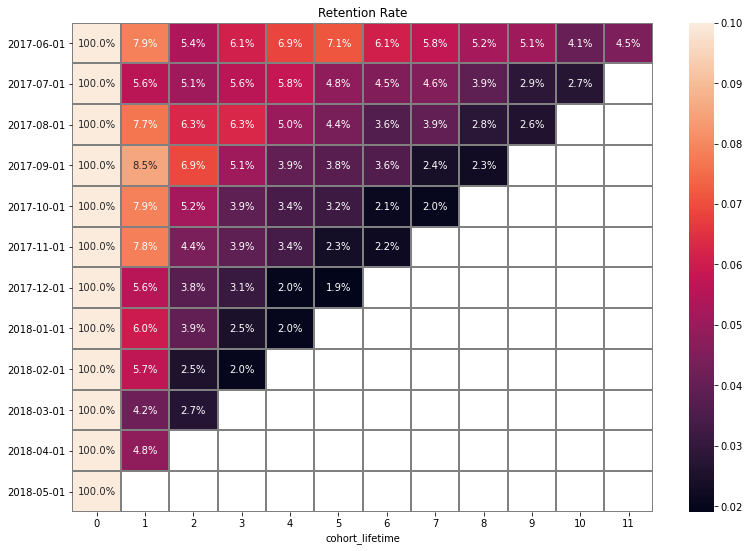

In [20]:
#Производим расчеты Retention Rate
retention =  pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]], axis=1)
retention.columns =  cohorts.columns
retention.index = [str(x)[0:10] for x in retention.index]
plt.figure(figsize=(13,9))
#Нарисуем тепловую карту
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1).set(title='Retention Rate')
plt.show()

Исходя из полученных результатов средний Retention Rate на второй месяц «жизни» когорт составил 0,065. При этом можно констатировать, что среднее значение по всем когортам снижается исходя из их продолжительности жизни.

In [21]:
#Посмотрим среднее по всем когортам
retention.describe()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
count,12.0,11.000000,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
mean,1.0,0.065167,0.046333,0.042760,0.040595,0.039444,0.036957,0.037509,0.035465,0.035159,0.034062,0.044951
std,0.0,0.014757,0.014307,0.015761,0.017316,0.017549,0.014992,0.015441,0.013083,0.013636,0.009318,NaN
min,1.0,0.041818,0.025454,0.020093,0.020244,0.019036,0.021365,0.020364,0.022809,0.026029,0.027473,0.044951
25%,1.0,0.055945,0.038329,0.031107,0.030361,0.027818,0.025315,0.024186,0.026624,0.027322,0.030768,0.044951
50%,1.0,0.059715,0.047704,0.038958,0.036826,0.037835,0.036101,0.039485,0.033354,0.028615,0.034062,0.044951
75%,1.0,0.078444,0.053391,0.056164,0.052125,0.046089,0.043104,0.045738,0.042195,0.039724,0.037357,0.044951
max,1.0,0.085489,0.069205,0.062764,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951


__Выводы:__
На основе анализа продуктовых метрик можно сделать следующие выводы:
- DAU составляет 907 посетителей, WAU -  5 621 посетителей, а MAU - 23228 посетителей. То есть по данным покахзателям наблюдается стабильным прирост. 
-  средняя продолжительность за один заход на сайте составляет 643 секунды, то есть чуть больше 10 минут. При этом если говорить о моде, то лна составляет 60 секунд.
- Количество поситетелей, которые возвращаются после первого посещения сайта находится на очень низком уровне, то есть падение по всем когортам составляет в первый месяц жизни более 90%. Это говорит о том, что пользователь не возвращается на сайт после первого его посещения. В данном случае необходимо проводить более глубинный анализ, который позволит ответить в чем причина оттока такого большого количества посетителей.


### 2.2. Метрики электронной коммерции <a name="e-commerce_metrics"></a> 

#### Время первого посещания на сайте до совершения покупки
Для того, чтобы определить время посещания на сайте, необходимо сначала сделать группировку по пользователям по первым визитам на сайт (таблица __visits__), а во второй сделать сделать группировку по пользователям по первой покупке на сайте (таблица __orders__).

In [22]:
#добавим лень и месяц заказа, чтобы посчитать суммарную выручку за эти периоды
orders['buy_dt'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

#Найдем время первой покупки
first_orders = orders.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_dt'].astype('datetime64[M]')

#Соединим две таблицы по первому визиту и первому заказу
buyers = pd.merge(first_orders, first_visit, on='uid')

Следующим шагом стало нахождение среднего времени посещания на сайте до совершения покупки. Для этого мы создали новый столбей __'difference_day'__ и __'difference_seconds'__ , который показывает разницу между первым заказом и временем захода на сайт по дням и в секундах.

In [23]:
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])
buyers['first_session_ts'] = pd.to_datetime(buyers['first_session_ts'])
buyers['first_order_ts'] = pd.to_datetime(buyers['first_order_ts'])
#Находим разницу дней
buyers['difference_day'] = ((buyers['first_order_ts'] - buyers['first_session_ts'])/np.timedelta64(1,'D')).astype(int)
buyers['difference_day'] = buyers['difference_day'].round().astype(int)
#Находим разницу в секундах
buyers['difference_seconds'] = (buyers['first_order_ts'] - buyers['first_session_ts']).dt.total_seconds().astype(int)
buyers.head(5)

,uid,first_order_ts,first_order_dt,first_order_month,first_session_ts,first_session_dt,first_sessions_month,difference_day,difference_seconds
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-01,106,9241320
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-10-11 17:14:00,2017-10-11,2017-10-01,0,4740
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-01,0,71040
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0,0


Построим функцию, которая будет нам строить гистограмму. которая нам покажет распределение времени от первого входа на сайт до покупки в разных измерениях - в днях, в минутах и в секундах.

In [24]:
#Построим гистограмму
def build_hist(columns, bins, n):
    (buyers[columns].plot(kind='hist', bins=bins, figsize=(12,7))
                               .set(title='Распределение времени от первого входа на сайт до покупки по столбцу: ' + columns,
                                   xlabel='Количество дней после посещения сайта',
                                   ylabel='Частота'))
    plt.xlim(0, n)
    plt.show()

Построим гистограмму, которая нам покажет распределение времени от первого входа на сайт до покупки в днях.

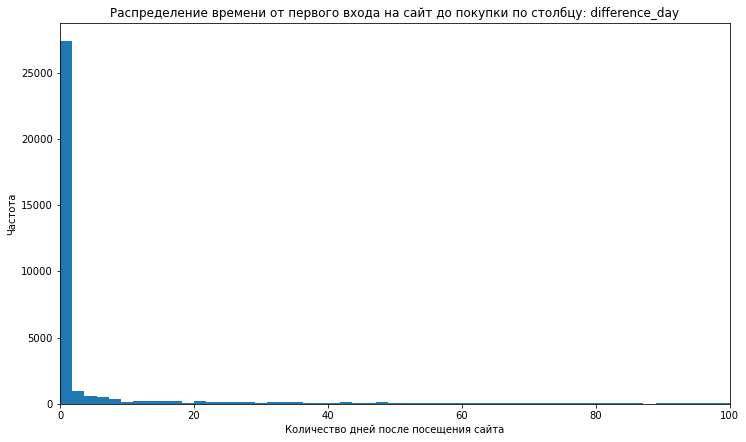

In [25]:
build_hist('difference_day', 200, 100)

Так как распределение не близко к нормальному, то нужно использовать моду (значение в выборке, которое встречается чаще всего). Мода показала, что люди при заходе на сайт сразу же покупают необходимый товар.

In [26]:
asl = buyers['difference_day'].mode()
asl

0    0
dtype: int32

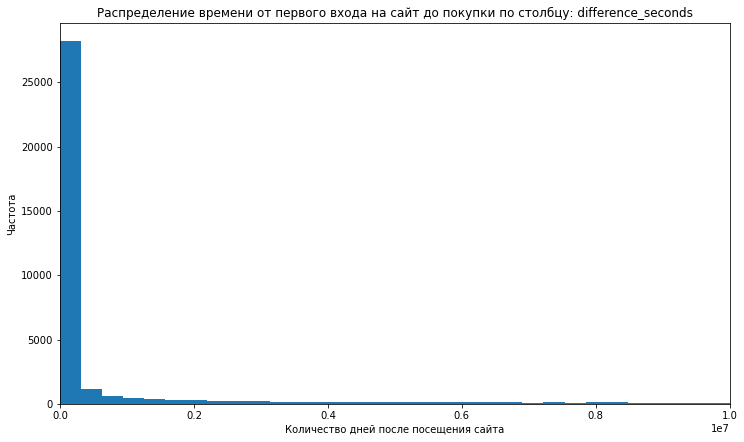

In [27]:
build_hist('difference_seconds', 100, 10000000)

Так как в данном случае  распределение не близко к нормальному, то снова используем моду. Между заходом на сайт и покупкой составляет 60 секунд или 1 минута. То есть человек за очень короткий промежуток принимает решение купить необходимый для него товаор.

In [28]:
asl = buyers['difference_seconds'].mode()
asl

0    60
dtype: int32

#### Расчет среднего количества покупок на одного покупателя

Для расчета среднего количества покупок на одного покупателя необходимо применить когортный анализ.

In [29]:
#Сделаем когорты, для этого объединим таблицу orders с таблицей первого визита
orders_new = pd.merge(orders, first_orders, on='uid')
#Найдем помесячные когорты
orders_new['cohort_lifetime'] = (orders_new['order_month'] - orders_new['first_order_month'])/ np.timedelta64(1,'M')
orders_new['cohort_lifetime'] = orders_new['cohort_lifetime'].round().astype('int')


Сгруппируем данные по когорте и по первому месяцу заказа с нахождением количества уникальных пользователей и количество заказов. 

In [30]:
#Сгруппируем данные по когорте и по первому месяцу заказа с нахождением количества уникальных пользователей и количество заказов
cohorts_new_group = orders_new.groupby(['first_order_month', 'cohort_lifetime']).agg({'uid':'nunique', 'revenue' :'count'}).reset_index()
#Посчитаем среднее количество количество покупок на одного покупателя
cohorts_new_group['purchases_per_player'] = (cohorts_new_group['revenue'] / cohorts_new_group['uid']).map(lambda x: "{0:.2f}".format(x))
cohorts_new_group['purchases_per_player'] = cohorts_new_group['purchases_per_player'].astype(float)
cohorts_new_group

,first_order_month,cohort_lifetime,uid,revenue,purchases_per_player
0,2017-06-01,0,2023,2354,1.16
1,2017-06-01,1,61,177,2.90
2,2017-06-01,2,50,174,3.48
3,2017-06-01,3,54,226,4.19
4,2017-06-01,4,88,292,3.32
...,...,...,...,...,...
74,2018-03-01,2,58,176,3.03
75,2018-04-01,0,2276,2495,1.10
76,2018-04-01,1,69,195,2.83
77,2018-05-01,0,2988,3249,1.09


Строим сводную таблицу, в которой индекс - __first_order_month__, столбцы - __cohort_lifetime__, а в значениях - __purchases_per_player__.

In [31]:
#Построим сводную таблицу
number_purchases = cohorts_new_group.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='purchases_per_player',
    aggfunc='mean'
).reset_index()

number_purchases.fillna('')

cohort_lifetime,first_order_month,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,1.16,2.9,3.48,4.19,3.32,3.25,4.45,3.7,3.66,3.4,2.13,1.62
1,2017-07-01,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04,
2,2017-08-01,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48,,
3,2017-09-01,1.14,1.68,1.61,2.22,1.29,1.7,1.64,1.51,1.42,,,
4,2017-10-01,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87,,,,
5,2017-11-01,1.18,1.79,1.52,1.99,1.68,1.23,1.65,,,,,
6,2017-12-01,1.15,1.85,1.96,1.85,1.72,1.67,,,,,,
7,2018-01-01,1.12,1.96,1.92,1.49,1.73,,,,,,,
8,2018-02-01,1.12,1.88,1.43,1.79,,,,,,,,
9,2018-03-01,1.17,1.98,3.03,,,,,,,,,


Сделаем расчеты среднего количества покупок на одного покупателя за 6 месяцев.

In [32]:
#Найдем количество покупок на одного покупателя за 6 месяцев.
mean_purchases = round(number_purchases[5].mean(), 2)
print('Cреднее количество покупок на одного покупателя за 6 месяцев составило', mean_purchases)

Cреднее количество покупок на одного покупателя за 6 месяцев составило 1.91


#### Рассчет среднего чека

По большому счету расчет среднего чека очень схож с поиском среднего количества покупок на одного покупателя, просто нужно найти вместо количества заказов сумму полученной прибыли. Для этого сгруппируем данные по когорте и по первому месяцу заказа с нахождением количества уникальных пользователей и сумма заказов.

In [33]:
#Сгруппируем данные по когорте и по первому месяцу заказа с нахождением количества уникальных пользователей и сумма заказов.
cohorts_average_check = orders_new.groupby(['first_order_month', 'cohort_lifetime']).agg({'uid':'nunique', 'revenue' :'sum'}).reset_index()

#Посчитаем средний чек
cohorts_average_check['check_per_player'] = (cohorts_average_check['revenue'] / cohorts_average_check['uid']).map(lambda x: "{0:.2f}".format(x))
cohorts_average_check['check_per_player'] = cohorts_average_check['check_per_player'].astype(float)
cohorts_average_check

,first_order_month,cohort_lifetime,uid,revenue,check_per_player
0,2017-06-01,0,2023,9557.49,4.72
1,2017-06-01,1,61,981.82,16.10
2,2017-06-01,2,50,885.34,17.71
3,2017-06-01,3,54,1931.30,35.76
4,2017-06-01,4,88,2068.58,23.51
...,...,...,...,...,...
74,2018-03-01,2,58,1114.87,19.22
75,2018-04-01,0,2276,10600.69,4.66
76,2018-04-01,1,69,1209.92,17.54
77,2018-05-01,0,2988,13925.76,4.66


Строим сводную таблицу, в которой индекс - __first_order_month__, столбцы - __cohort_lifetime__, а в значениях - __purchases_per_player__.

In [34]:
#Построим сводную таблицу
average_check = cohorts_average_check.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='check_per_player',
    aggfunc='mean'
)

average_check.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,16.1,17.71,35.76,23.51,22.21,31.01,25.03,19.3,27.23,25.68,9.8
2017-07-01,6.01,12.4,21.04,10.79,6.94,7.9,6.42,6.99,7.38,12.86,11.51,
2017-08-01,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,,
2017-09-01,5.64,22.19,13.45,138.67,19.88,26.1,27.44,16.96,11.04,,,
2017-10-01,5.00,11.29,6.75,7.41,7.07,7.26,6.57,7.48,,,,
2017-11-01,5.15,7.34,6.79,12.51,7.46,4.58,7.56,,,,,
2017-12-01,4.74,7.82,39.37,48.14,27.43,23.52,,,,,,
2018-01-01,4.14,8.72,12.37,11.2,4.7,,,,,,,
2018-02-01,4.16,8.61,4.94,6.94,,,,,,,,


Найдем средний чек за 6 месяцев.

In [35]:
#Найдем количество покупок на одного покупателя за 6 месяцев.
mean_check = round(average_check[5].mean(), 2)
print('Cредний чек за 6 месяцев составил', mean_check)

Cредний чек за 6 месяцев составил 14.82


In [36]:
### Код ревьювера ###

orders['revenue'].mean()

4.999646930476993

#### Расчет LTV на покупателя по когортам
Для расчета LTV на нужно рассчитать два показателя, а именно количество уникальных покупателей за месяц первого заказа и сумму выручки, которая получается по каждой когорте. Для поиска количества уникальных покупателей сгруппируем данные в таблице __buyers__ по первому месяцу заказа, для это используем метод __'nunique'__.

In [37]:
#Группируем уникальных пользователей
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
#Переименовываем колонки
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head(5)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Для нахождения суммы выручки соединяем две таблицы __orders__ и __buyers__ и сразу же их группируем по месяцу заказа и по первому месяцу заказа. Затем найдем возраст когорты и соединим две таблицы -  __cohorts__ и __cohort_sizes__. LTV находим с помощью деления суммы доходов на количество посетителей.

In [38]:
#Соединяем две таблицы orders и buyers,для подсчета суммы доходов
cohorts = pd.merge(orders, buyers, how='inner', on='uid').groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

#Находим возраст когорты
cohorts['age'] = (cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')
cohorts['age'] = cohorts['age'].round().astype('int')

#Соединяем две таблицы cohorts и cohort_sizes
cohorts = pd.merge(cohorts, cohort_sizes, on='first_order_month')
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts.head(10)

,first_order_month,order_month,revenue,age,n_buyers,ltv
0,2017-06-01,2017-06-01,9557.49,0,2023,4.724414
1,2017-06-01,2017-07-01,981.82,1,2023,0.485329
2,2017-06-01,2017-08-01,885.34,2,2023,0.437637
3,2017-06-01,2017-09-01,1931.30,3,2023,0.954671
4,2017-06-01,2017-10-01,2068.58,4,2023,1.022531
5,2017-06-01,2017-11-01,1487.92,5,2023,0.735502
6,2017-06-01,2017-12-01,1922.74,6,2023,0.950440
7,2017-06-01,2018-01-01,1176.56,7,2023,0.581592
8,2017-06-01,2018-02-01,1119.15,8,2023,0.553213
9,2017-06-01,2018-03-01,1225.51,9,2023,0.605788


Строим сводную таблицу, в которой индекс - __first_order_month__, столбцы - __age__, а в значениях - __ltv__. При этом принято находить LTV накопительным итогом, для этого мы будем применять метод __cumsum()__. 

In [39]:
output = cohorts.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='sum')

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт включили когорты, «прожившие» не менее 6 месяцев.

In [40]:
mean_ltv = round(output.loc[:, 5].mean(), 2)
print('Средний LTV по когортам за 6 месяцев составляет', mean_ltv)

Средний LTV по когортам за 6 месяцев составляет 0.33


__Вывод__<br>
<br>
Таким образом если рассматривать метрики электронной коммерции, то можно сделать следующие выводы:
- время первого посещания на сайте до момента покупки как правило идентично, то есть люди заходят и сразу же покупают;
- cреднее количество покупок на одного покупателя за 6 месяцев составило 10.98, что в целом не является большим показателем;
- cредний чек за 6 месяцев составил 102.88 у.е, то есть люди в целом покупает не очень дорогие категории товара;
- cредний LTV по когортам за 6 месяцев составляет 4.6, то есть выручка на одного покупателя не очень высокая.

### 2.3. Маркетинговые метрики <a name="marketing_metrics"></a> 

#### Общая сумма расходов на маркетинг.

Общая сумма на маркетинг получилась 329 131 у.е. за анализируемый период

In [41]:
cost_total = costs['costs'].sum()
print('Общая сумма на маркетинг составила', cost_total)

Общая сумма на маркетинг составила 329131.62


Если по источникам рассматривать, то получилось, что на третий источник приходится больше всего расходов. При этом на данный источник приходится 42%. На втором месте стоит четвертый источник, а на пятом месте - пятый

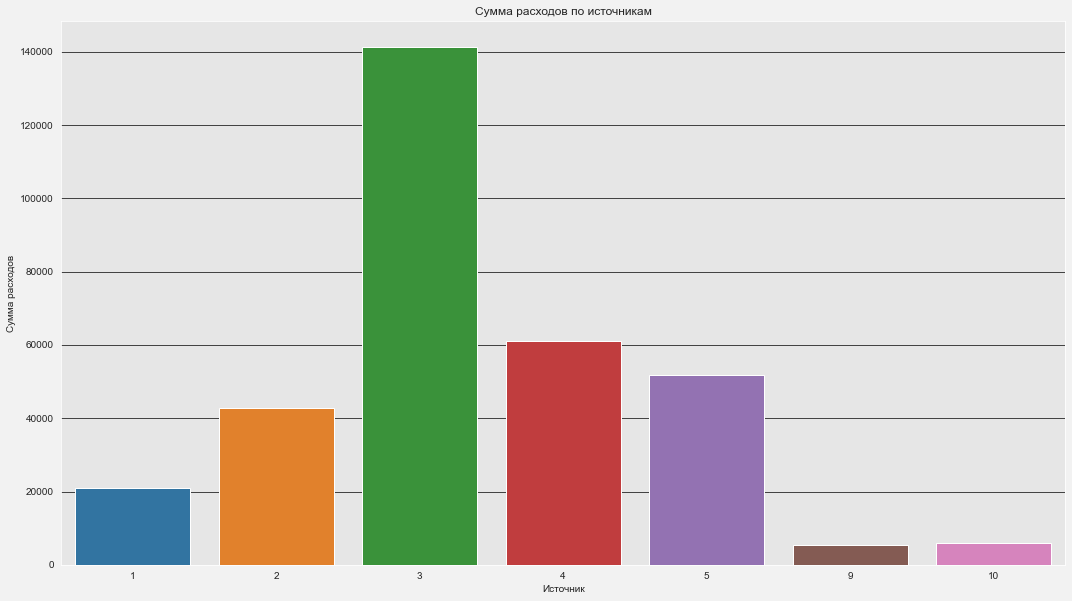

In [42]:
costs_source = costs.groupby('source_id').sum().reset_index()
sns.set_style('darkgrid',#задаем стили графикам
            {'axes.facecolor': '0.9',
            'grid.color': '0.1',
            'figure.facecolor': '0.95'})
    
plt.figure(figsize=(18,10))
sns.barplot(data=costs_source, x='source_id', y='costs')
plt.title("Сумма расходов по источникам")
plt.xlabel("Источник")
plt.ylabel("Сумма расходов");

>**<span style="color:green">Здесь все супер, молодец!</span>**

#### Расчет САС.
Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Для этого мы соединим вначале две таблицы __buyers__ (в нем содержится информация о покупатеоях) и __users__ (информация о source_id).

In [43]:
#Находим для каждого uid  источник по которому он попал на сайтпервый раз 
users = visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]

#Соединяем две таблицы buyers и users
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers.head(5)

,uid,first_order_ts,first_order_dt,first_order_month,first_session_ts,first_session_dt,first_sessions_month,difference_day,difference_seconds,source_id
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-01,106,9241320,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0,0,10
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-10-11 17:14:00,2017-10-11,2017-10-01,0,4740,3
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-01,0,71040,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0,0,5


Выделим уникальных пользователей за день, так как посчитаем, что нужно будет рассчитать CAC по дням, чтобы точно модно было определить уникальных пользователей

In [44]:
#Создаем новую группировку по уникальным пользователем с присвоением источника захода
user_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()

#Переименовываем столбцы
user_daily.rename(columns={'uid': 'n_buyers'})
datetime(user_daily, 'first_order_dt')

In [45]:
costs['costs_month'] = costs['date'].astype('datetime64[M]')
#Создаем новую таблицу которая позволит нам рассчитать CAC, а именно поделить расходы на количество уникальных пользователей
costs_new = pd.merge(costs, user_daily, left_on=['source_id', 'date'], right_on=['source_id', 'first_order_dt'])
costs_new['costs_per_buyer'] = costs_new['costs'] / costs_new['uid']
costs_new.head(5)

,source_id,date,costs,costs_month,first_order_dt,uid,costs_per_buyer
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,14,5.371429
1,1,2017-06-02,62.25,2017-06-01,2017-06-02,7,8.892857
2,1,2017-06-03,36.53,2017-06-01,2017-06-03,7,5.218571
3,1,2017-06-04,55.00,2017-06-01,2017-06-04,3,18.333333
4,1,2017-06-05,57.08,2017-06-01,2017-06-05,18,3.171111


In [46]:
#Создаем сводную таблицу, в котором будет отражен CAC расчитанный помесячно
costs_id = costs_new .pivot_table(
        index='costs_month', 
        columns='source_id', 
        values='costs_per_buyer', 
        aggfunc='mean')

costs_id

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07-01,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08-01,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09-01,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10-01,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11-01,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12-01,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02-01,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


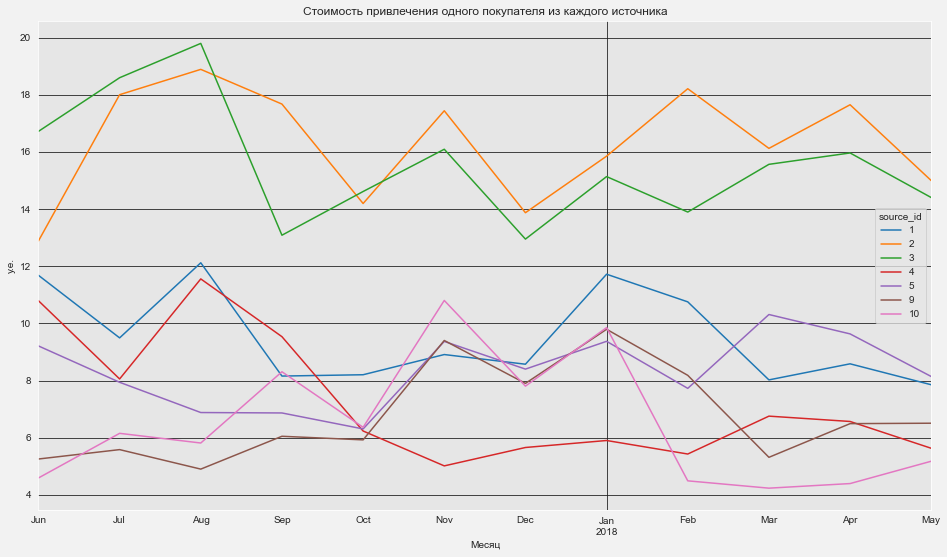

In [47]:
#Нарисуем график
costs_id.plot(figsize=(16,9), title='Стоимость привлечения одного покупателя из каждого источника')
plt.xlabel('Месяц')
plt.ylabel('у.e.')   
plt.show()

На основе полученного анализа можно сделать вывод, что самые дорогими источниками для привлечения клиентов являются источник номер 2 и номер 3. Их CAC за месяц как правило превышает 15 у.е. Самым дешевым источником является источник 4, при этом по нему наблюдается самое резкое падение с 11 у.е в августе месяце до 5 у.е. в ноябре. В целом можно говорить, что по всем источникам наблюдается скачкообразное тенденция, то вверх, то вниз, что требует более детального изучения.

#### Рассчет ROMI по когортам в разрезе источников. 

Для подсчета ROMI необходимо найти выручку и количество покупателей за определенный месяц. Вначале найдем количество уникальных пользователей по первому заказу в разрезе источников трафика. Создадим новый данные __user_month__ с группировкой по __source_id__, __first_order_month__. 

In [48]:
#Сгруппируем данные по ууникальным пользователям в разрезе источников и первого заказа.
user_month = buyers.groupby(['source_id', 'first_order_month']).agg({'uid': 'nunique'}).reset_index()
user_month.columns = ['source_id', 'first_order_month', 'n_buyers']

Затем с помощью __merge__ и __groupby__ рассчитаем сумму выручки в разрезе первого месяца заказа, месяца заказа и источника трафика. Следующим этапом является нахождение разницы между выполненным заказом и первым заказом. Создадим новый Series __calculation_romi__, который соединит нам количество уникальных пользователей и сумму выручку в разрезе источников по первой покупке. Все это позволит нам рассчитать такой показатель как __ltv__, то есть отношение валовой прибыли к количеству покупателей.   

In [49]:
#Соединяем две таблицы orders и buyers для подсчета суммы доходов
calculation_romi= pd.merge(orders, buyers, how='inner', on='uid').groupby(['first_order_month', 'order_month', 'source_id']).agg({'revenue': 'sum'}).reset_index()


#Находим возраст когорты
calculation_romi['age'] = (calculation_romi['order_month'] - calculation_romi['first_order_month']) / np.timedelta64(1, 'M')
calculation_romi['age'] = calculation_romi['age'].round().astype('int')

#Соединяем две таблицы calculation_romi и user_month
calculation_romi = pd.merge(calculation_romi, user_month, on=['first_order_month', 'source_id'])
#Рассчитаем  показатель  ltv - отношение валовой прибыли к количеству покупателей.
calculation_romi['ltv'] = calculation_romi['revenue'] / calculation_romi['n_buyers']
calculation_romi.head(10)

,first_order_month,order_month,source_id,revenue,age,n_buyers,ltv
0,2017-06-01,2017-06-01,1,1378.70,0,190,7.256316
1,2017-06-01,2017-07-01,1,414.98,1,190,2.184105
2,2017-06-01,2017-08-01,1,419.43,2,190,2.207526
3,2017-06-01,2017-09-01,1,714.24,3,190,3.759158
4,2017-06-01,2017-10-01,1,811.20,4,190,4.269474
5,2017-06-01,2017-11-01,1,389.34,5,190,2.049158
6,2017-06-01,2017-12-01,1,490.48,6,190,2.581474
7,2017-06-01,2018-01-01,1,479.23,7,190,2.522263
8,2017-06-01,2018-02-01,1,432.15,8,190,2.274474
9,2017-06-01,2018-03-01,1,316.30,9,190,1.664737


Затем добавим к вновь созданной таблице __calculation_romi__ информацию о среднем показателе CAC по каждому виду источника. __ROMI__ находим просто, делим покахзатель __LTV__ на __CAC__. 

In [50]:
#Найдем средний показатель CAC по каждому виду источнику из данных costs_new
cac_mean = costs_new.groupby('source_id').agg({'costs_per_buyer': 'mean'})

#Добавляем к вновь созданной таблице сalculation_romi информацию о среднем показателе CAC по каждому виду источника
calculation_romi = calculation_romi.join(cac_mean, on='source_id')
calculation_romi.rename(columns={'costs_per_buyer': 'cac'}, inplace=True)
calculation_romi['romi'] = calculation_romi['ltv'] / calculation_romi['cac']

Сделаем функцию, которая построит нам тепловую карту по __ROMI__ по каждому виду  источнику. Исходя из полученных данных можно сделать вывод что самым рентабельным источником является первый, по крайней такая тенденция прослеживалась вначале, но с каждой когортой показатель по __ROMI__ снижался, то есть популярность данного источника снижалась с каждой когортой. Второй и третий источник из-за высоких расходов не показывают большую рентабельность. Отметим, что по второму источнику наблюдается некая положительная динамика по рентабельности по некоторым когортам.


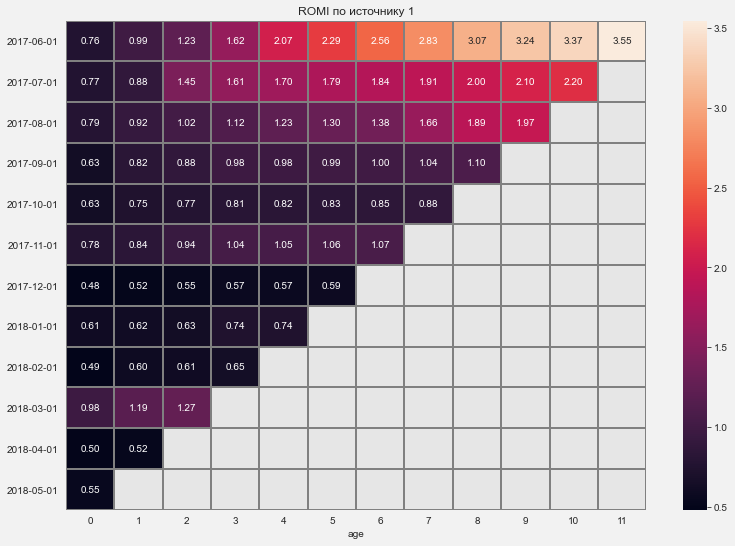

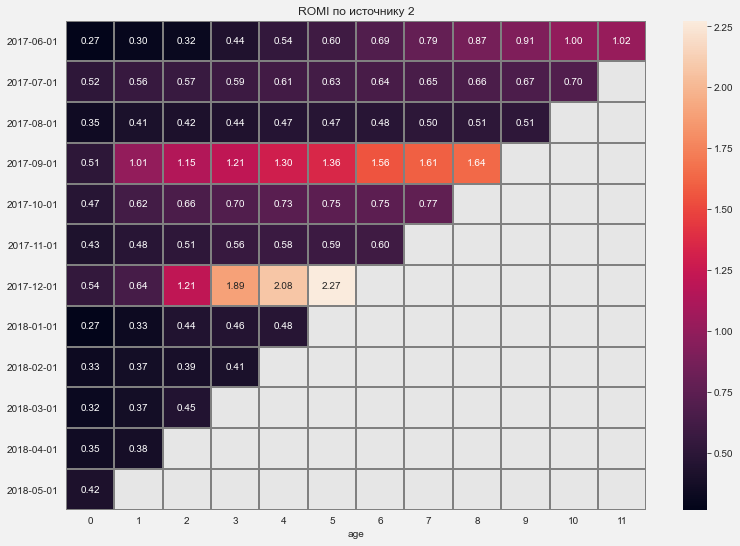

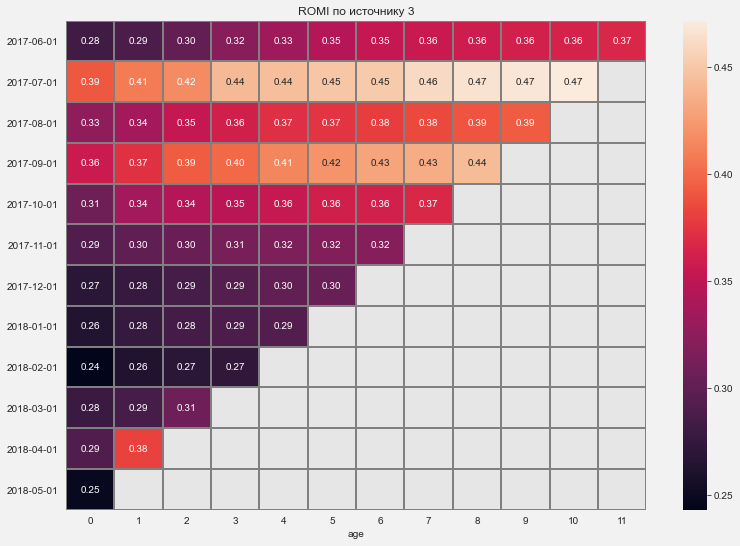

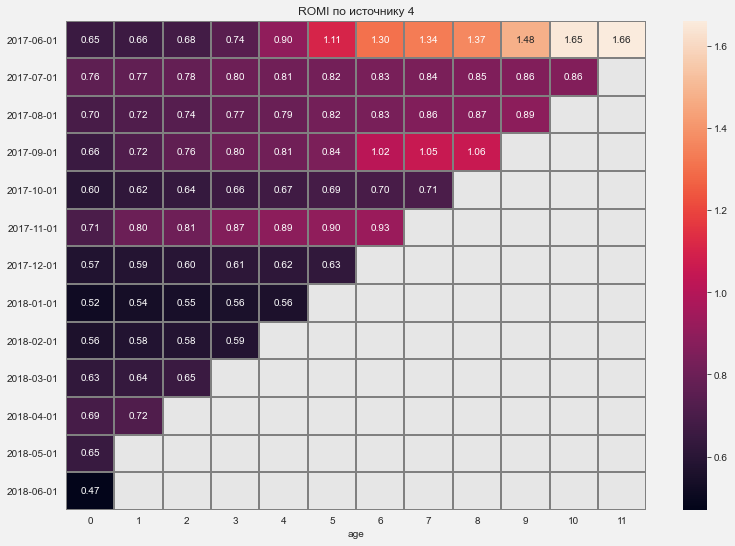

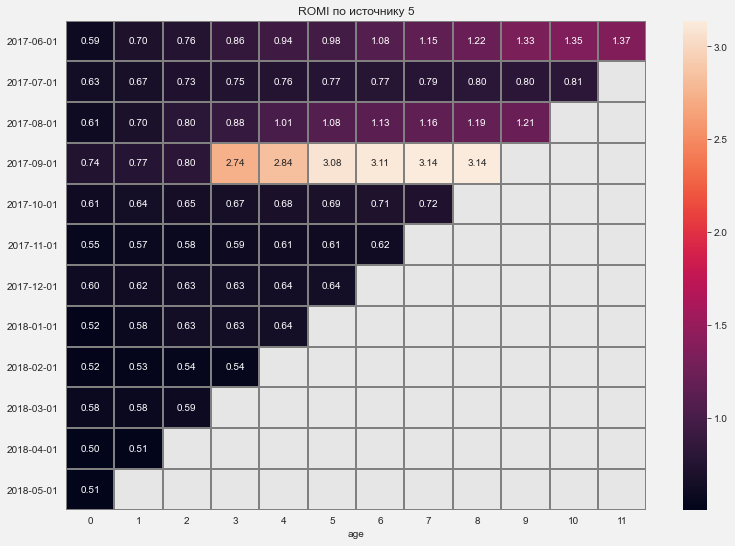

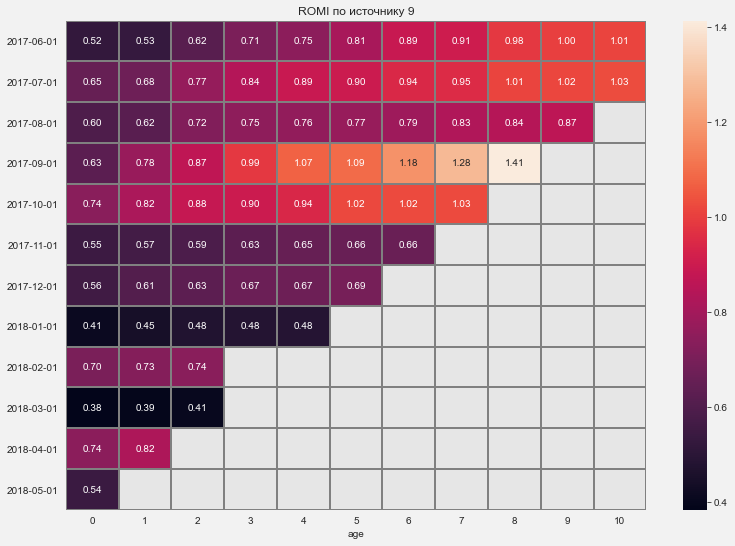

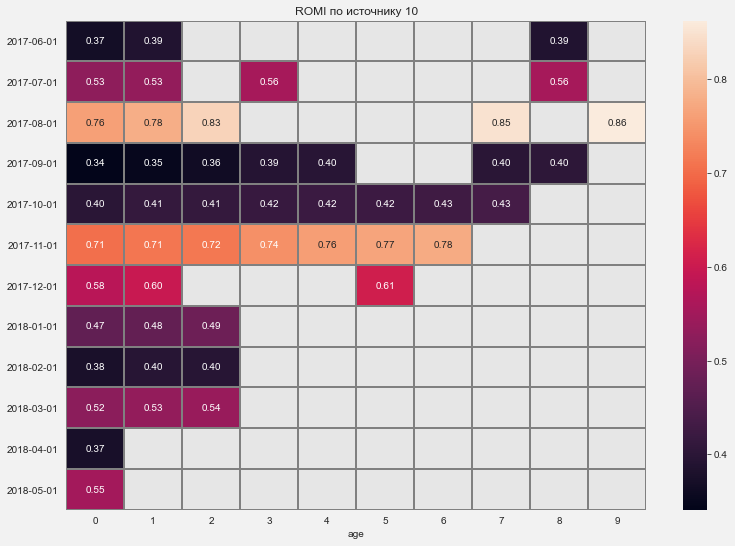

In [51]:
#Создадим функцию, которую нам будет строить тепловую карту по ROMI по каждому виду  источнику
def columns(column):
    romi_pivot = calculation_romi.query('source_id == @column')#Делаем срез по виду источника 
    cohorts_pivot = romi_pivot.pivot_table(#Создаем сводную таблицу
        index='first_order_month',
        columns='age',
        values = 'romi',
        aggfunc='mean').cumsum(axis=1)
    cohorts_pivot.fillna('')
    
    #Строим тепловую карту
    plt.figure(figsize=(13, 9))
    plt.title('ROMI по источнику ' + str(column))
    cohorts_pivot.index = [str(x)[0:10] for x in cohorts_pivot.index]
    sns.heatmap(cohorts_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

#Прогоняем данные по циклу
data = [1, 2, 3, 4, 5, 9, 10]

for i in data:
    columns(i)

__Вывод__<br>
<br>
Таким образом если рассматривать маркетинговые метрики, то можно сделать следующие выводы:
- общая сумма на маркетинг получилась 329 131 у.е. за анализируемый период.
- на третий источник приходится больше всего расходов, а именно 42% от общего объема расходов по всем видам истоничков.
- самыми дорогими источниками для привлечения клиентов являются источник номер 2 и номер 3,  их CAC за месяц как правило превышает 15 у.е.ъ
- самым рентабельным источником является первый, у него самые большие показатели ROMI. При этом такие прибыльные источники как второй и третий из-за высоких расходов обладают не самым высоким ROMI.

## 3. Сформулируйте выводы и рекомендации <a name="conclusion"></a>

Исходя из проведенного анализа сделаем следующие выводы:<br>
1) Необходимо делать ставку отделу маркетинга на первый источник, на второй и на четвертый. Первый источник требует относительно немного затрат, но при этом нужно проанализировать причины снижения показателей по сравнению с первой когортой. Второй источник демонстрирует относительно повышения показателей по некоторым когортам, то есть у этого источника есть определенный потенициал для роста. Относительно стабильным является четвертый источник, при этом он занимает второе место по показателю ROMI по первой когорте. Наименее перспективным является с нашей точки зрения последний источник, за некоторые периоды даже не удалось найти ROMI, а также третий источник, от него очень низкий показатель ROMI, а расходы на него огромные

2) Подсчет метрик трех видов: маркетинговых, продуктовых и метрик электронной коммерции, выявил следующие проблемные зоны:
- огромный отток пользователей после первого посещения сайта, то есть людей не заинтересовывает контент сайт и они потом не возвращаются, при этом если анализировать такие показатели как DAU, MAU и WAU, то они показывают положительную динамику;
- люди проводят малое время на сайте, как правило они заходят на сайт, покупает, то что нужно и выходят, средний чек и количество покупок тоже находится не на самом высоком уровне,  именно среднее количество покупок на одного покупателя за 6 месяцев составило 10.98, а средний чек 103 доллара. То есть люди заходят и покупают не часто и не на большую сумму;
- cредний LTV по когортам за 6 месяцев составляет 4.6, то есть выручка на одного покупателя не очень высокая. Самые высокие результаты по выручке на одного человека показали когорта в июне и в сентябре. А в целом можно говорить, что LTV по каждой когорте снижался по сравнению с предыдущей;
- самыми дорогими источниками для привлечения клиентов являются источник номер 2 и номер 3. Их CAC за месяц как правило превышает 15 у.е. Самым дешевым источником является источник 4, при этом по нему наблюдается самое резкое падение;
- самым рентабельным источником является первый, по крайней такая тенденция прослеживалась вначале, но с каждой когортой показатель по ROMI по данному виду источника снижался, то есть популярность данного источника снижалась с каждой когортой. Второй и третий источник из-за высоких расходов не показывают большую рентабельность. Отметим, что по второму источнику наблюдается некая положительная динамика по рентабельности по некоторым когортам.

3) Подводя итог, можно сказать, что все проанализируемые показатели говорят о динамике их снижения за определенные периоды времени. То есть необходимо делать более глубинный анализ причин падения данных показателей. Если говорить о когортах, то самыми из них перспективными для компании являются когорты июня и  когорты сентября, видимо это связано с тем, что в сентябре люди многие возвращаются с отпусков или на учебу, поэтому они являются более активными в плане покупок товаров. Самыми не рентабельными когортами являются когорты января и февраля, то есть это период после новогодних каникул, когда люди спускают огромную часть средств, поэтому их покупательная активность снижается. 